In [1]:
%load_ext autoreload
%reload_ext autoreload
#%autoreload 2

from myutils import *

In [2]:
# import
import os, json, glob
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload; 

%matplotlib inline

In [3]:
import utils; #reload(utils)
from utils import plots

from fastai.imports import *
from fastai.transforms import *
from fastai.model import *
from fastai.sgdr import *
from fastai.plots import *

Using TensorFlow backend.


In [4]:
print(os.getcwd())
#path='../../../datasets/DogVsCat'
path='../../../datasets/dogsncats/'

/home/sanmati/zatul/git/DeepLearning/fast.ai/meLearning


In [5]:
# this is all in one function
# It will copy the data into train_1 and then split into valid and sample without
# impacting the original dataset
#data_splitter('../../../datasets/dogsncats/train', '../../../datasets/dogsncats', nsample=1, nvalid=2, labels=['cat', 'dog'])
#data_splitter('../../../datasets/dogsncats/train', '../../../datasets/dogsncats', nsample=1, nvalid=2)


## This will create the label wise sub directories and move the data
# dataCategorizer(list(['cat', 'dog']), "../../../datasets/dogsncats/train")

# sampling the data from training set
#data_sampler(10, '../../../datasets/dogsncats/train/cat', '../../../datasets/dogsncats/sample/cat')
#data_sampler(10, '../../../datasets/dogsncats/train/dog', '../../../datasets/dogsncats/sample/dog')

# validation data
#data_sampler(2000, '../../../datasets/dogsncats/train/cat', '../../../datasets/dogsncats/valid/cat')
#data_sampler(2000, '../../../datasets/dogsncats/train/dog', '../../../datasets/dogsncats/valid/dog')

In [6]:
cat_files = !ls -1 '{path}/train/cat' | head
cat_files

['cat.0.jpg',
 'cat.10000.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1000.jpg',
 'cat.10010.jpg']

In [7]:
# displaying the image
img = plt.imread(f'{path}/train/cat/{cat_files[2]}')
print(img.shape)

(471, 499, 3)


In [8]:
print(img)

[[[62 64 61]
  [62 64 61]
  [61 63 60]
  ..., 
  [73 67 55]
  [73 67 55]
  [73 67 55]]

 [[59 61 58]
  [58 60 57]
  [58 60 57]
  ..., 
  [73 67 55]
  [73 67 55]
  [73 67 55]]

 [[56 58 55]
  [55 57 54]
  [56 58 55]
  ..., 
  [73 67 55]
  [73 67 55]
  [73 67 55]]

 ..., 
 [[59 52 44]
  [59 52 44]
  [60 53 43]
  ..., 
  [23 18 15]
  [24 19 16]
  [25 20 17]]

 [[59 52 44]
  [59 52 44]
  [60 53 43]
  ..., 
  [24 19 16]
  [24 19 16]
  [25 20 17]]

 [[59 52 44]
  [59 52 44]
  [60 53 43]
  ..., 
  [24 19 16]
  [25 20 17]
  [26 21 18]]]


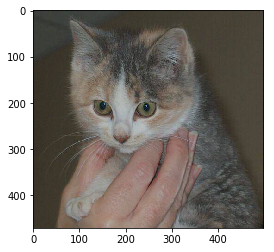

In [9]:
plt.imshow(img)

## Using Vgg16 pretrained Net

batch_size = 64
print(sys.path)
#sys.path.insert(0, '/home/sanmati/zatul/git/DeepLearning/fast.ai/meLearning')
#sys.path.insert(0, '')
print()
print(sys.path)

# Import our class, and instantiate  
from vgg16up import *; reload(vgg16up); from vgg16up import Vgg16

vgg = Vgg16()
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

## Using resnet pretrained model